In [1]:
from energymercato.setup.starting import SpotSetup, RealTimeSetup

creation of specific plant for France


In [2]:
# path = "/mnt/g/Mon Drive/SEM/energymercato/"
path = "./usetests/try/"
spot = SpotSetup(path, solo=False)

path  usetests is existing ? True
Initialization of SPOT Market with parameters :
- legal client price : 60€
penalty price for J-1 : 300€/MWh
ARENH Price and volume proportion: 50€/MWh / 0.25%


In [12]:
# Setup game
spot.generate_players()
spot.simulate_game_data()

defining players...
Power consumption is taken on Pmax = 56303.28 = self.total_power-self.total_power_enr)*.95


In [16]:
spot.change_round_day()

Welcome in the SPOT Market of day 2022-01-17 !
Simulating weather and consumption...
...ok
Writing to file


<Axes: >

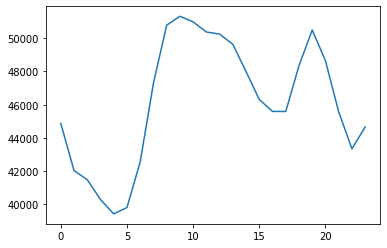

In [15]:
spot.plot_conso()

Fixing market automatic process...
waiting for filling...


/home/projects/energymercato/energymercato/venv/lib/python3.8/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


<Axes: xlabel='cumsum_p_max'>

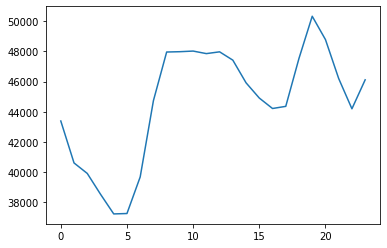

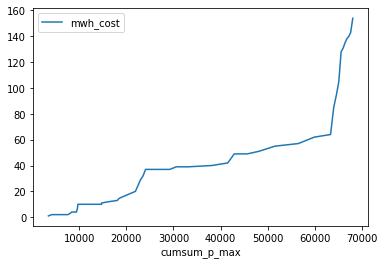

In [17]:
spot.fix_market()
spot.plot_fixing(12)
spot.plot_fixing(1)

In [18]:
spot.read_prev_from_players()

ok for production orders
ok for market orders


In [19]:
spot.compute_scores()

/home/projects/energymercato/energymercato/src/energymercato/usecases/usecases.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["amount"] = -a["mwh_cost"] * a["p"]
/home/projects/energymercato/energymercato/src/energymercato/usecases/usecases.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["amount"] = -a["mwh_cost"] * a["p"]
/home/projects/energymercato/energymercato/src/energymercato/usecases/usecases.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [20]:
spot.get_scores()

In [21]:
from energymercato.setup.starting import save, load

In [22]:
save(spot,"usetests/data/spot.pkl")

Let's play for Real Time !

In [23]:
realtime = RealTimeSetup(spot)

Initialization of Real Time Market with parameters:
- Real time spot price: 300
- Transaction price: 300
ready for next phase


In [24]:
realtime.start_spot()

 Welcome in the Real Time Market of day 2022-01-17 at 0h !
Real consumption = 43385
Real Production = 23461
Balance = 19924
Go to spot file and fill spot column with adjustment to reach balance = 0
Ready for balancing
 Difference of Real Consumption with SPOT is 19924


In [25]:
realtime.read_spot()

Balance was 19924. It is now 43385
Balance is not adjusted


In [26]:
realtime.wait_for_adjustment()

You have 2 x 5 minutes before blackout
Tic, Toc... Blackout is coming
Balance was 19924. It is now 43385
Balance is not adjusted
Balance left : 19924
Tic, Toc... Blackout is coming
Balance was 19924. It is now 43385
Balance is not adjusted
Balance left : 19924
Tic, Toc... Blackout is coming


KeyboardInterrupt: 

In [ ]:
realtime.compute_score()

AttributeError: 'DataFrame' object has no attribute 'spot_changes'

In [ ]:
spot.get_scores()